# Mount Google Drive to access zip file with data

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzip data into the *splits* directory

In [4]:
# create directory for data
!mkdir data

# unzip files from zip folder
!unzip "/content/drive/MyDrive/Projekt badawczy - terminy medyczne/001_004.zip" -d "data/"

Archive:  /content/drive/MyDrive/Projekt badawczy - terminy medyczne/001_004.zip
   creating: data/001_004/
  inflating: data/001_004/001_004_online.csv  
  inflating: data/001_004/004_00005_20230711T124716.wav  
  inflating: data/001_004/004_00017_20230711T124847.wav  


# Import libraries

In [5]:
from fastai import *
from fastai.vision import *
import pathlib
import os
from scipy import signal
from scipy.io import wavfile
from fastprogress import progress_bar
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt


# Load sample data

In [6]:
data_path = pathlib.Path('./data/001_004/')
# List the first 11 files in the directory
files = list(data_path.glob('*'))
print(files)

[PosixPath('data/001_004/004_00005_20230711T124716.wav'), PosixPath('data/001_004/004_00017_20230711T124847.wav'), PosixPath('data/001_004/001_004_online.csv')]



# Audio Data Augmentation


## Original

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


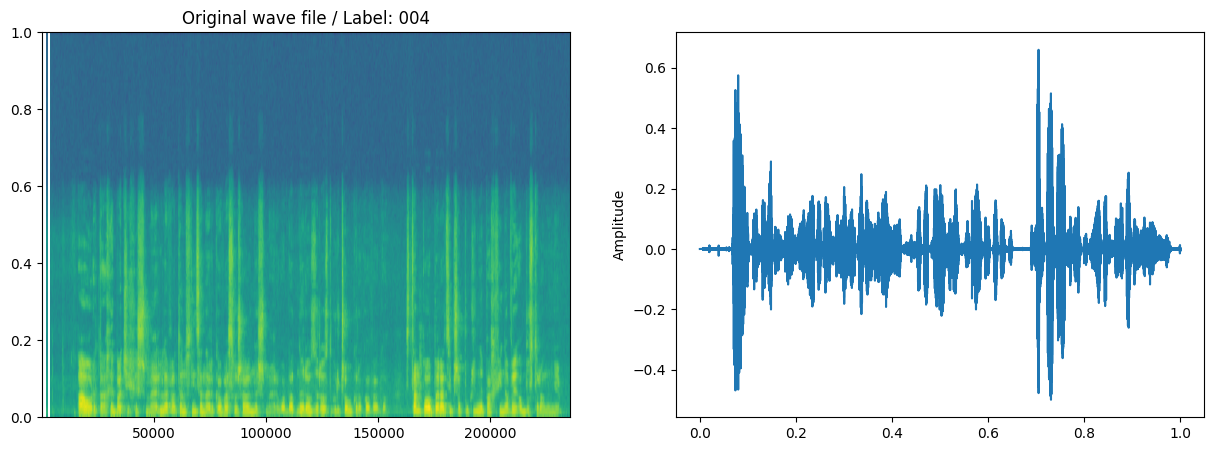

In [7]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
    label = str(fpath).split('/')[-1].split('_')[0]
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].title.set_text(f'{title} / Label: {label}')
    ax[0].specgram(data,Fs=2)
    fig.savefig('temp1.png',bbox_inches="tight",pad_inches=0)
    ax[1].set_ylabel('Amplitude')
    ax[1].plot(np.linspace(0,1,len(data)), data)

file_path = files[0]
wav, sr = librosa.load(file_path,sr=None)
plot_spec(wav,sr,'Original wave file',file_path)
ipd.Audio(data=wav,rate=sr)

## Noise addition

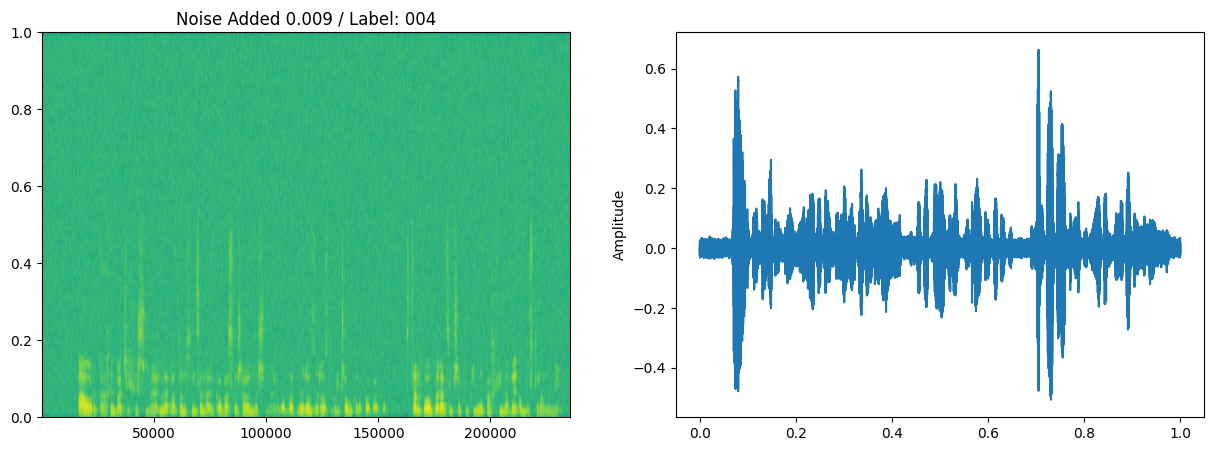

In [8]:
'''
Noise addition using normal distribution with mean = 0 and std =1

Permissible noise factor value = x > 0.004
'''
wav_n = wav + 0.009*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.009',file_path)
ipd.Audio(data=wav_n,rate=sr)

## Shifting the sound wave

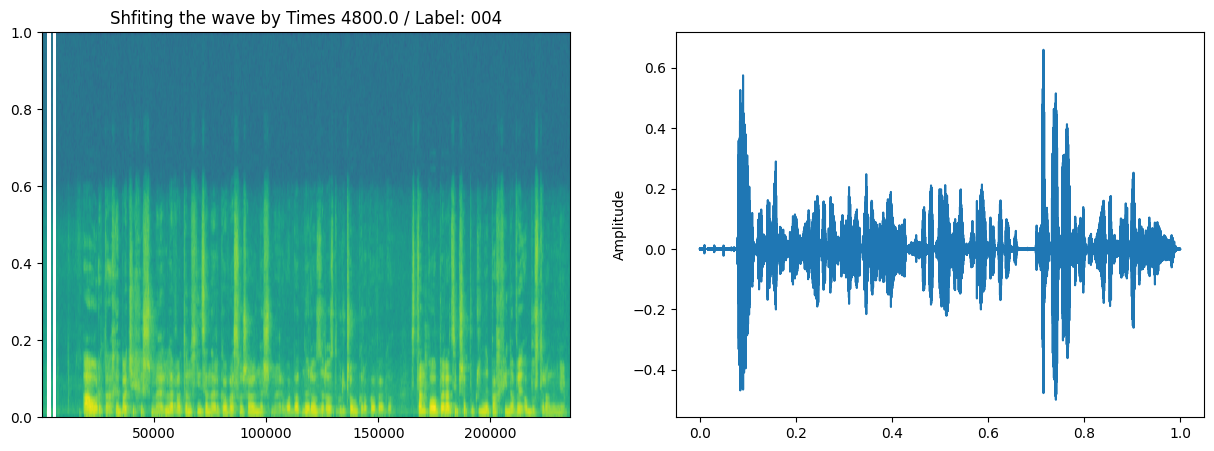

In [13]:
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr/10))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/10}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)

## Time-stretching

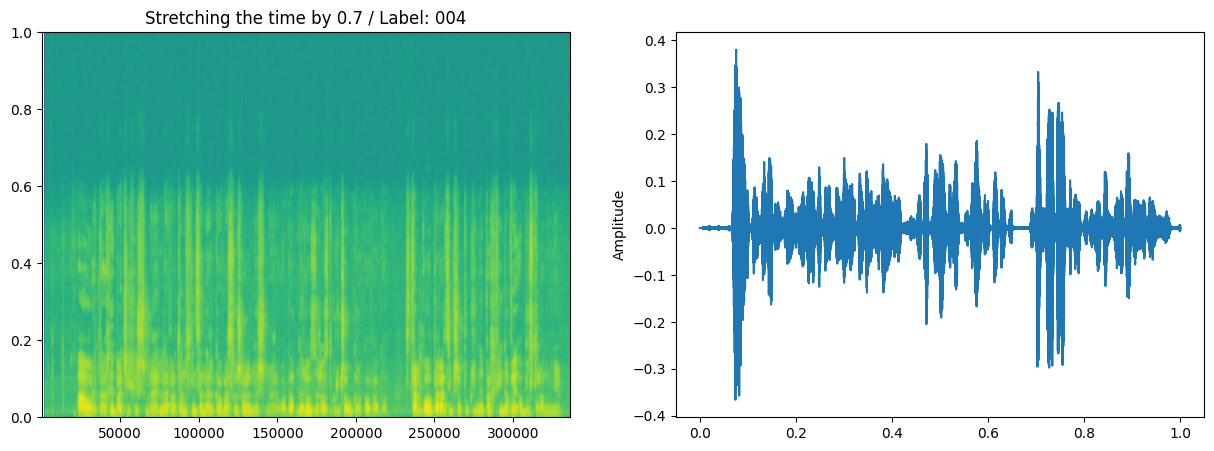

In [18]:
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.7
wav_time_stch = librosa.effects.time_stretch(y=wav,rate=factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)

## Pitch shifting

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7773: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


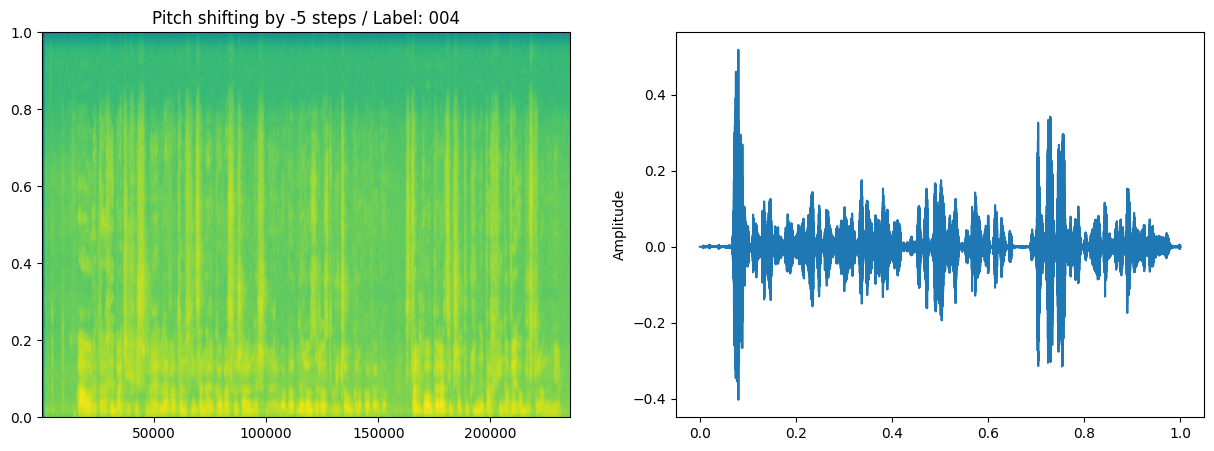

In [21]:
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(y=wav,sr=sr,n_steps=5)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-5} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)

-----------------------------------